In [ ]:
!pip3 install --upgrade pip
!pip3 install Kqlmagic --no-cache-dir --upgrade
!pip3 install nbformat

     |████████████████████████████████| 229 kB 5.8 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 19.5 MB/s eta 0:00:01
     |████████████████████████████████| 11.7 MB 22.0 MB/s eta 0:00:01
     |████████████████████████████████| 108 kB 50.3 MB/s eta 0:00:01
     |████████████████████████████████| 20.6 MB 28.2 MB/s eta 0:00:01     |███████████████████▏            | 12.3 MB 28.2 MB/s eta 0:00:01
     |████████████████████████████████| 115 kB 25.6 MB/s eta 0:00:01
     |████████████████████████████████| 40 kB 53.2 MB/s eta 0:00:01
     |████████████████████████████████| 6.9 MB 32.1 MB/s eta 0:00:01     |███████                         | 1.5 MB 32.1 MB/s eta 0:00:01
     |████████████████████████████████| 94 kB 34.1 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 23.3 MB/s eta 0:00:01
     |████████████████████████████████| 45 kB 48.7 MB/s eta 0:00:01
     |████████████████████████████████| 293 kB 28.0 MB/s eta 0:00:01
     |████████████████████████████████|

In [2]:
import pandas as pd
pd.options.plotting.backend = "plotly"
import plotly.express as px

Add Kqlmagic to notebook magics

<IPython.core.display.Javascript object>


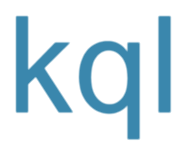

In [4]:
%reload_ext Kqlmagic

In [5]:
%kql loganalytics://code;workspace='1054c1b0-f063-40a7-823e-91dac02fbabc';alias='arturol76-edge-benchmark'

<IPython.core.display.Javascript object>

Will the MaxUpstreamBatchSize=100 increase the latency of low-rate streams?

# login
```bash
ssh arturo@standard-ds3-v2-edge-1-2-1626596809.westeurope.cloudapp.azure.com -i ../keys/vm-key
```

# deploy test
```bash
az iot edge set-modules -n arturol76-s1-benchmark -d standard-ds3-v2-edge-1-2-1626596809 --content ../tests/test30-low-rate-metrics-1.2.json
```


In [ ]:
!az iot edge set-modules -n arturol76-s1-benchmark -d standard-ds3-v2-edge-1-2-1626596809 --content ../tests/test30-low-rate-metrics-1.2.json

In [136]:
from datetime import datetime, timedelta
from dateutil import parser
testStart=parser.parse("2021-07-28T17:11:00Z")
testStop=parser.parse("2021-07-28T17:15:00Z")

In [147]:
%%kql
    let _start=testStart;
    let _stop=testStop;
    InsightsMetrics 
    | where Origin == "iot.azm.ms" and Namespace == "metricsmodule" 
    | where Name == "edgehub_queue_length" 
    | extend dimensions=parse_json(Tags) 
    | extend device = tostring(dimensions.edge_device) 
    | extend ep = tostring(dimensions.endpoint) 
    | where  ep == "iothub"
    | extend qlen = toint(Val)
    | where qlen > 0 and qlen != 2490317 
    | where TimeGenerated > _start and TimeGenerated < _stop 
    | project TimeGenerated, qlen
    | render timechart title='edgehub_queue_length'

[]

In [148]:
df = _kql_raw_result_.to_dataframe()
df = df.sort_values(by=['TimeGenerated'])

In [149]:
qlenDf = df

In [150]:
%%kql
    let _start=testStart;
    let _stop=testStop;
    let _module_id="source";
    InsightsMetrics
    | where Origin == "iot.azm.ms" and Namespace == "metricsmodule"
    | where Name == "rate"
    | extend dimensions = parse_json(Tags)
    | extend module_id = dimensions.module_id
    | extend channel = dimensions.input_index
    | where module_id == _module_id
    | where TimeGenerated > _start and TimeGenerated < _stop
    | project TimeGenerated, Val

TimeGenerated,Val
2021-07-28 17:12:52+00:00,1.79892064761143
2021-07-28 17:12:32+00:00,1.19928043174096
2021-07-28 17:12:39+00:00,0
2021-07-28 17:12:36+00:00,1.19928043174096
2021-07-28 17:11:02+00:00,0
2021-07-28 17:11:10+00:00,0
2021-07-28 17:11:04+00:00,0
2021-07-28 17:11:06+00:00,0
2021-07-28 17:11:08+00:00,0
2021-07-28 17:11:19+00:00,0


[{'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 12, 52, tzinfo=tzutc()), 'Val': 1.79892064761143},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 12, 32, tzinfo=tzutc()), 'Val': 1.19928043174096},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 12, 39, tzinfo=tzutc()), 'Val': 0},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 12, 36, tzinfo=tzutc()), 'Val': 1.19928043174096},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 2, tzinfo=tzutc()), 'Val': 0},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 10, tzinfo=tzutc()), 'Val': 0},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 4, tzinfo=tzutc()), 'Val': 0},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 6, tzinfo=tzutc()), 'Val': 0},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 8, tzinfo=tzutc()), 'Val': 0},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 19, tzinfo=tzutc()), 'Val': 0},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 28, tzinfo=tzutc()), 'Val': 0},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 13, tzinfo=tzutc()), 'Val': 0},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 24, tzinfo=tzutc()), 'Val': 0},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 15, tzinfo=tzutc()), 'Val': 0},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 22, tzinfo=tzutc()), 'Val': 0},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 30, tzinfo=tzutc()), 'Val': 0},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 40, tzinfo=tzutc()), 'Val': 0},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 12, 5, tzinfo=tzutc()), 'Val': 99.1207034372502},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 49, tzinfo=tzutc()), 'Val': 0},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 12, 10, tzinfo=tzutc()), 'Val': 99.6996996996997},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 45, tzinfo=tzutc()), 'Val': 0},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 47, tzinfo=tzutc()), 'Val': 0},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 51, tzinfo=tzutc()), 'Val': 0},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 12, 19, tzinfo=tzutc()), 'Val': 0},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 12, 21, tzinfo=tzutc()), 'Val': 0},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 12, 16, tzinfo=tzutc()), 'Val': 1.2},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 12, 12, tzinfo=tzutc()), 'Val': 1.2},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 12, 25, tzinfo=tzutc()), 'Val': -101.159536185526},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 12, 27, tzinfo=tzutc()), 'Val': 100.0200040008},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 12, 14, tzinfo=tzutc()), 'Val': 1.2},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 12, 50, tzinfo=tzutc()), 'Val': 99.619923984797},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 12, 43, tzinfo=tzutc()), 'Val': -101.339196482111},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 12, 46, tzinfo=tzutc()), 'Val': -101.339196482111},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 12, 41, tzinfo=tzutc()), 'Val': 0},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 12, 23, tzinfo=tzutc()), 'Val': -101.159536185526},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 12, 48, tzinfo=tzutc()), 'Val': 99.619923984797},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 26, tzinfo=tzutc()), 'Val': 0},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 26, tzinfo=tzutc()), 'Val': 0},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 33, tzinfo=tzutc()), 'Val': 0},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 17, tzinfo=tzutc()), 'Val': 0},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 36, tzinfo=tzutc()), 'Val': 0},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 38, tzinfo=tzutc()), 'Val': 0},
 {'TimeGenerated': datetime.datetime(20

In [151]:
df = _kql_raw_result_.to_dataframe()
df = df.sort_values(by=['TimeGenerated'])

In [152]:
sourceRateDf = df

In [153]:
%%kql
    let _start=testStart;
    let _stop=testStop;
    let _module_id="sink";
    let _input_index="input1";
    InsightsMetrics
    | where Origin == "iot.azm.ms" and Namespace == "metricsmodule"
    | where Name == "rate"
    | extend dimensions = parse_json(Tags)
    | extend module_id = dimensions.module_id
    | extend channel = dimensions.input_index
    | where module_id == _module_id and dimensions.input_index == _input_index
    | where TimeGenerated > _start and TimeGenerated < _stop
    | project TimeGenerated, Val

TimeGenerated,Val
2021-07-28 17:12:52+00:00,38.0076015203041
2021-07-28 17:12:32+00:00,37.6075215043009
2021-07-28 17:12:39+00:00,37.6075215043009
2021-07-28 17:12:36+00:00,37.6075215043009
2021-07-28 17:11:02+00:00,9.2
2021-07-28 17:11:10+00:00,9.2
2021-07-28 17:11:04+00:00,9.2
2021-07-28 17:11:06+00:00,9.2
2021-07-28 17:11:08+00:00,9.2
2021-07-28 17:11:19+00:00,9.2


[{'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 12, 52, tzinfo=tzutc()), 'Val': 38.0076015203041},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 12, 32, tzinfo=tzutc()), 'Val': 37.6075215043009},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 12, 39, tzinfo=tzutc()), 'Val': 37.6075215043009},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 12, 36, tzinfo=tzutc()), 'Val': 37.6075215043009},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 2, tzinfo=tzutc()), 'Val': 9.2},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 10, tzinfo=tzutc()), 'Val': 9.2},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 4, tzinfo=tzutc()), 'Val': 9.2},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 6, tzinfo=tzutc()), 'Val': 9.2},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 8, tzinfo=tzutc()), 'Val': 9.2},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 19, tzinfo=tzutc()), 'Val': 9.2},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 28, tzinfo=tzutc()), 'Val': 9.2},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 13, tzinfo=tzutc()), 'Val': 9.2},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 24, tzinfo=tzutc()), 'Val': 9.2},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 15, tzinfo=tzutc()), 'Val': 9.2},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 22, tzinfo=tzutc()), 'Val': 9.2},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 30, tzinfo=tzutc()), 'Val': 9.2},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 40, tzinfo=tzutc()), 'Val': 9.2},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 12, 5, tzinfo=tzutc()), 'Val': 99.7800439912018},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 49, tzinfo=tzutc()), 'Val': 9.2},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 12, 10, tzinfo=tzutc()), 'Val': 37.4374374374374},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 45, tzinfo=tzutc()), 'Val': 9.2},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 47, tzinfo=tzutc()), 'Val': 9.2},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 51, tzinfo=tzutc()), 'Val': 9.2},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 12, 19, tzinfo=tzutc()), 'Val': 37.4374374374374},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 12, 21, tzinfo=tzutc()), 'Val': 62.4249699879952},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 12, 16, tzinfo=tzutc()), 'Val': 37.4374374374374},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 12, 12, tzinfo=tzutc()), 'Val': 37.4374374374374},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 12, 25, tzinfo=tzutc()), 'Val': 99.9800039992002},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 12, 27, tzinfo=tzutc()), 'Val': 99.9800039992002},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 12, 14, tzinfo=tzutc()), 'Val': 37.4374374374374},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 12, 50, tzinfo=tzutc()), 'Val': 38.0076015203041},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 12, 1, tzinfo=tzutc()), 'Val': 62.8251300520208},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 12, 43, tzinfo=tzutc()), 'Val': 62.1627023785729},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 12, 46, tzinfo=tzutc()), 'Val': 99.8199639927986},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 12, 41, tzinfo=tzutc()), 'Val': 62.1627023785729},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 12, 23, tzinfo=tzutc()), 'Val': 62.4249699879952},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 12, 48, tzinfo=tzutc()), 'Val': 99.8199639927986},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 26, tzinfo=tzutc()), 'Val': 9.2},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 26, tzinfo=tzutc()), 'Val': 9.2},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 33, tzinfo=tzutc()), 'Val': 9.2},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 17, 11, 17, tzin

In [154]:
df = _kql_raw_result_.to_dataframe()
df = df.sort_values(by=['TimeGenerated'])

In [155]:
sinkRateDf = df

In [156]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=3, cols=1, shared_xaxes=True,
                    vertical_spacing=0.02)

fig.add_trace( 
    go.Line(x=sourceRateDf['TimeGenerated'], y=sourceRateDf['Val']), row=1, col=1
)

fig.add_trace( 
    go.Line(x=sinkRateDf['TimeGenerated'], y=sinkRateDf['Val']), row=2, col=1
)




fig.update_layout(title_text="Side By Side Subplots")
fig.show()